#### HOMEWORK 14

In [15]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

#### Step 0: Dataset Inspection

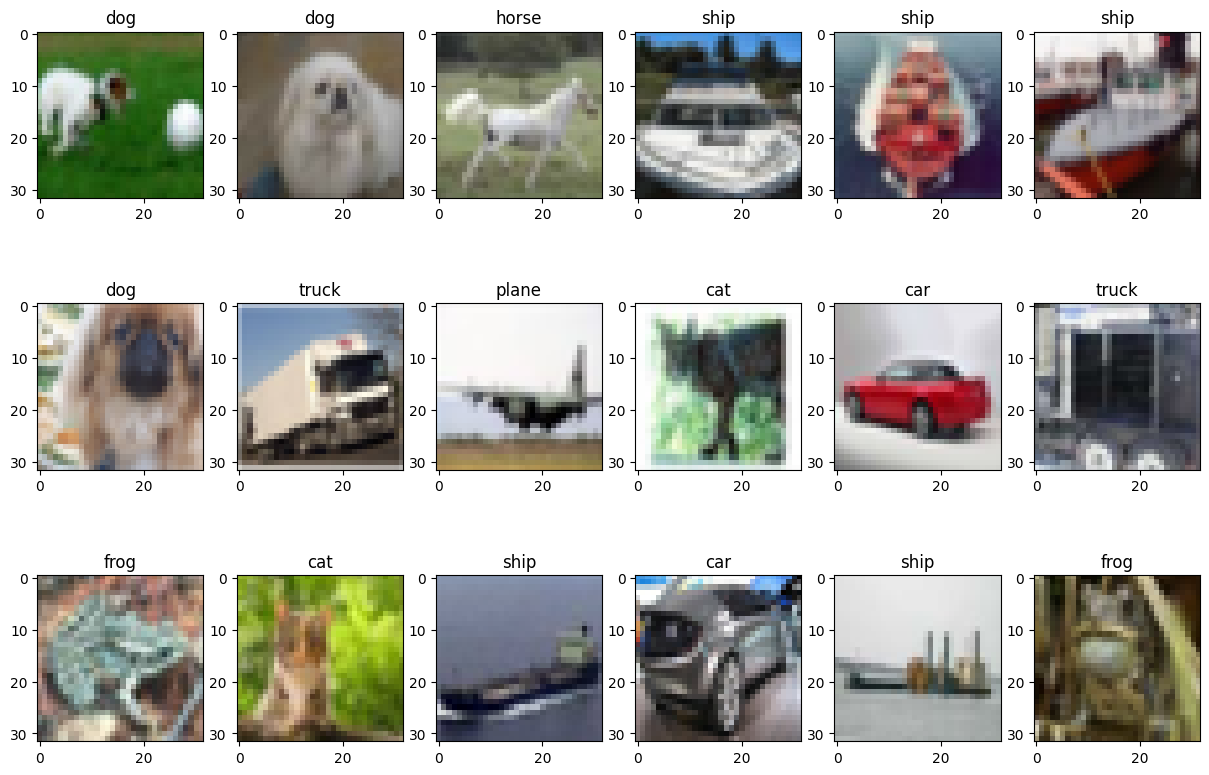

In [2]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Mapping from class ID to class name
classes = {0:'plane', 1:'car', 2:'bird', 3:'cat', 4:'deer',
           5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

# Dataset params
num_classes = len(classes)
size = x_train.shape[1]

# Visualize random samples (as a plot with 3x6 samples)
for ii in range(18):    
    plt.subplot(3,6,ii+1)
    # Pick a random sample
    idx = np.random.randint(0, len(x_train))
    # Show the image and the label
    plt.imshow(x_train[idx, ...])
    plt.title(classes[int(y_train[idx])])

In [3]:
# Compute the class histogram
hist, bins = np.histogram(y_train, bins=range(num_classes + 1))

#### Step 1: Data Preparation

In [4]:
# Normalization
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    50000 samples
Test set:     10000 samples
Sample dims:  (50000, 32, 32, 3)


#### Step 2: Building the Classifier

In [16]:
# Build the classifier
model = tf.keras.Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Show the model
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

#### Step 3: Training

In [6]:
epochs = 25
batch_size = 128

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(x_test, y_test))

Epoch 1/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 51ms/step - accuracy: 0.3333 - loss: 1.8096 - val_accuracy: 0.5537 - val_loss: 1.2417
Epoch 2/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.5702 - loss: 1.2147 - val_accuracy: 0.6157 - val_loss: 1.0911
Epoch 3/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 47ms/step - accuracy: 0.6470 - loss: 1.0115 - val_accuracy: 0.6605 - val_loss: 0.9739
Epoch 4/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.6925 - loss: 0.8853 - val_accuracy: 0.6824 - val_loss: 0.9179
Epoch 5/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 48ms/step - accuracy: 0.7235 - loss: 0.8127 - val_accuracy: 0.6990 - val_loss: 0.8819
Epoch 6/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 48ms/step - accuracy: 0.7411 - loss: 0.7531 - val_accuracy: 0.7124 - val_loss: 0.8444
Epoch 7/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 48ms/step - accuracy: 0.7652 - loss: 0.6851 - val_accuracy: 0.7080 - val_loss: 0.8644
Epoch 8/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.7879 - loss: 0.6225 - 

Train Acc      0.936680018901825
Validation Acc 0.7006999850273132


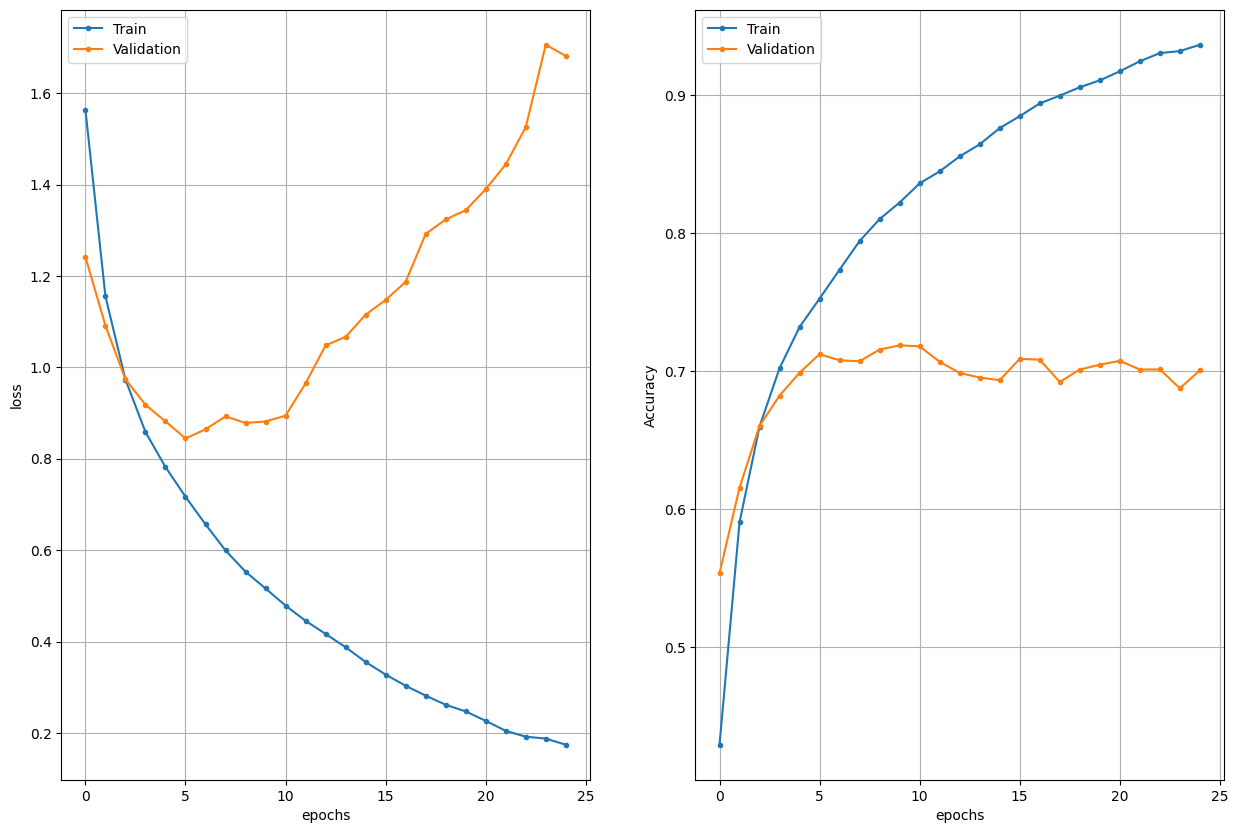

In [7]:
# Show training history (this cell is complete, nothing to implement here :-) )
h = history.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                           epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc     ', h['accuracy'][-1])
print('Validation Acc', h['val_accuracy'][-1])  

#### Step 4: Evaluation

In [8]:
# Compute the labels and the predictions as sparse values
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(model.predict(x_test), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [9]:
for class_id, class_name in classes.items():
    indices = np.where(y_true == class_id)
    acc = np.mean(y_true[indices] == y_pred[indices])
    print(class_name, acc)

plane 0.799
car 0.894
bird 0.621
cat 0.446
deer 0.517
dog 0.638
frog 0.871
horse 0.699
ship 0.821
truck 0.701


In [10]:
# Evaluate the model
ev = model.evaluate(x_test, y_test)

print('Test loss  ', ev[0])
print('Test metric', ev[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7070 - loss: 1.6421
Test loss   1.6812597513198853
Test metric 0.7006999850273132


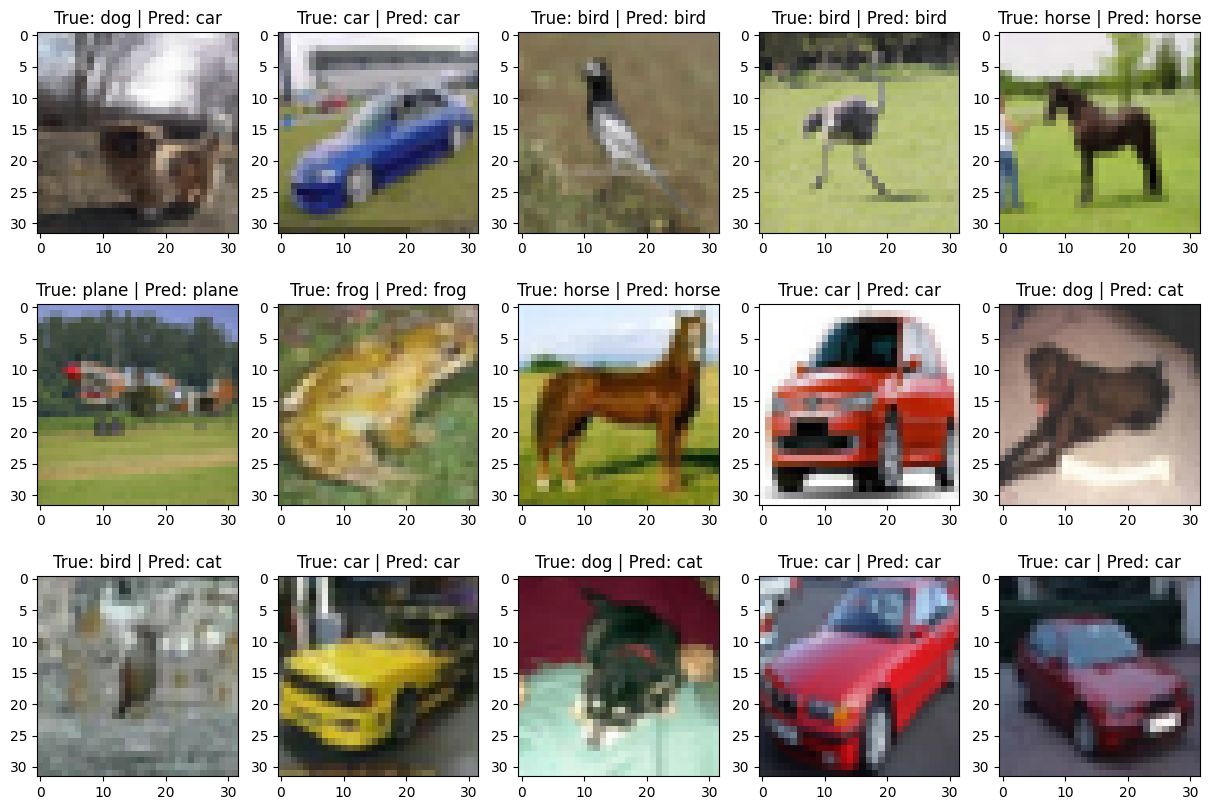

In [11]:
# Show random samples
for ii in range(15):
    # Pick a random sample
    idx = np.random.randint(0, len(x_test))
    # Show the results
    plt.subplot(3, 5, ii + 1), plt.imshow(x_test[idx, ...])
    plt.title('True: ' + str(classes[y_true[idx]]) + ' | Pred: ' + str(classes[y_pred[idx]]))

### Questions

#### What is the overall accuracy of the classifier?
- 0.708299994468689

#### What modifications would you do in order to improve the classification accuracy?
- Increase the model complexity: add more layers or more units in the existing layer to increase model complexity.

- Add dropout layers: This will help to reduce overfitting and therefore should increase validation accuracy.

- Increase the number of epochs: More training epochs might help model to learn better.

- Use data augmentation: This can help to generate more diverse training samples and therefore to reduce overfitting.

#### Make one modification (that you think can help) and train the classifier again. Does the accuracy improve?


In [12]:
from tensorflow.keras.layers import Dropout

# Build the classifier
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    Dropout(0.5),  # Add Dropout layer here
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# compile and train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=30, batch_size=batch_size, validation_data=(x_test, y_test))

Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.3249 - loss: 1.8316 - val_accuracy: 0.5118 - val_loss: 1.3406
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 48ms/step - accuracy: 0.5390 - loss: 1.2935 - val_accuracy: 0.6093 - val_loss: 1.0984
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 48ms/step - accuracy: 0.6085 - loss: 1.1046 - val_accuracy: 0.6481 - val_loss: 0.9980
Epoch 4/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 48ms/step - accuracy: 0.6522 - loss: 0.9906 - val_accuracy: 0.6814 - val_loss: 0.9026
Epoch 5/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - accuracy: 0.6817 - loss: 0.9073 - val_accuracy: 0.7028 - val_loss: 0.8546
Epoch 6/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 50ms/step - accuracy: 0.7037 - loss: 0.8443 - val_accuracy: 0.7144 - val_loss: 0.8222
Epoch 7/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.7196 - loss: 0.7966 - val_accuracy: 0.7151 - val_loss: 0.8176
Epoch 8/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 50ms/step - accuracy: 0.7360 - loss: 0.7509 - 

In [13]:
# evaluate model
ev = model.evaluate(x_test, y_test)
print('Test loss: ', ev[0])
print('Test metric: ', ev[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7841 - loss: 0.7129
Test loss:  0.716809093952179
Test metric:  0.7815999984741211


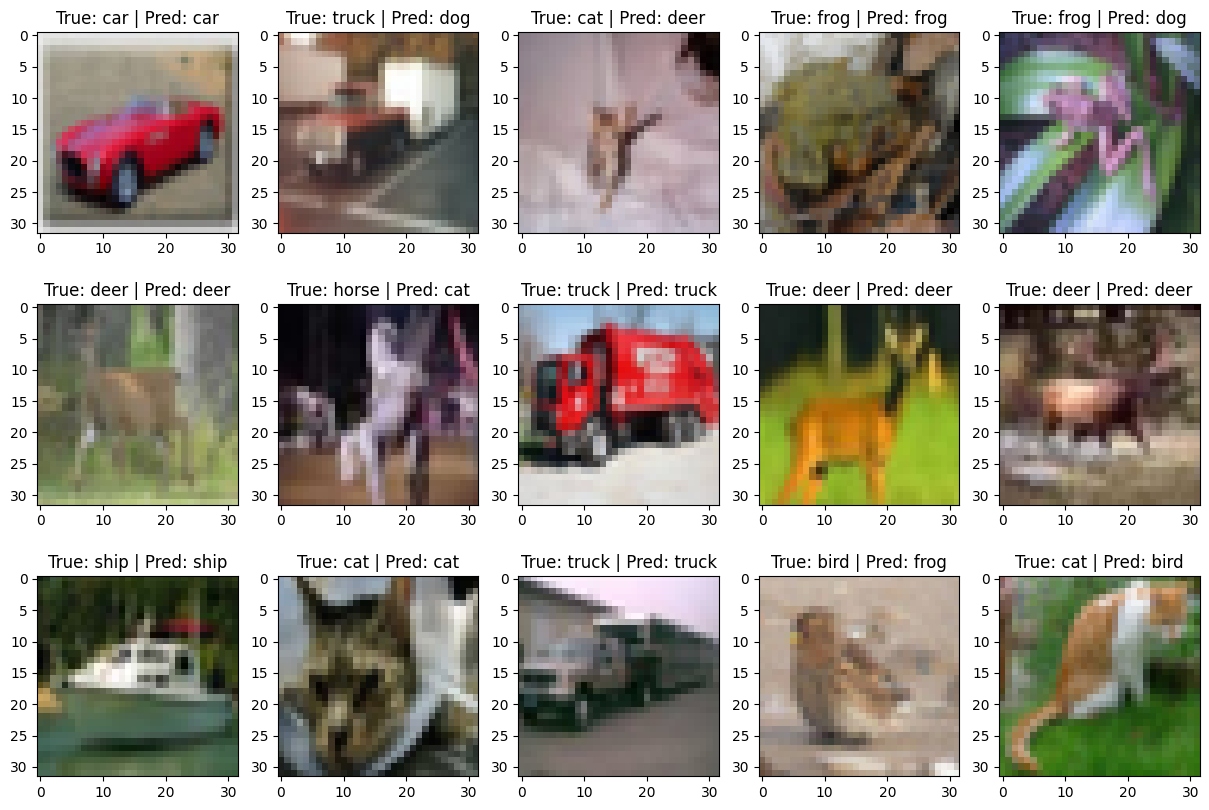

In [14]:
# Show random samples
for ii in range(15):
    # Pick a random sample
    idx = np.random.randint(0, len(x_test))
    # Show the results
    plt.subplot(3, 5, ii + 1), plt.imshow(x_test[idx, ...])
    plt.title('True: ' + str(classes[y_true[idx]]) + ' | Pred: ' + str(classes[y_pred[idx]]))